In [ ]:
!pip install opendatasets

## Iris dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import opendatasets as od
import os

sns.set_theme()

Breve vistazo del dataset de iris

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target_names'] = iris.target_names[iris.target]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Observamos los plots de las variables para ver su comportamiento

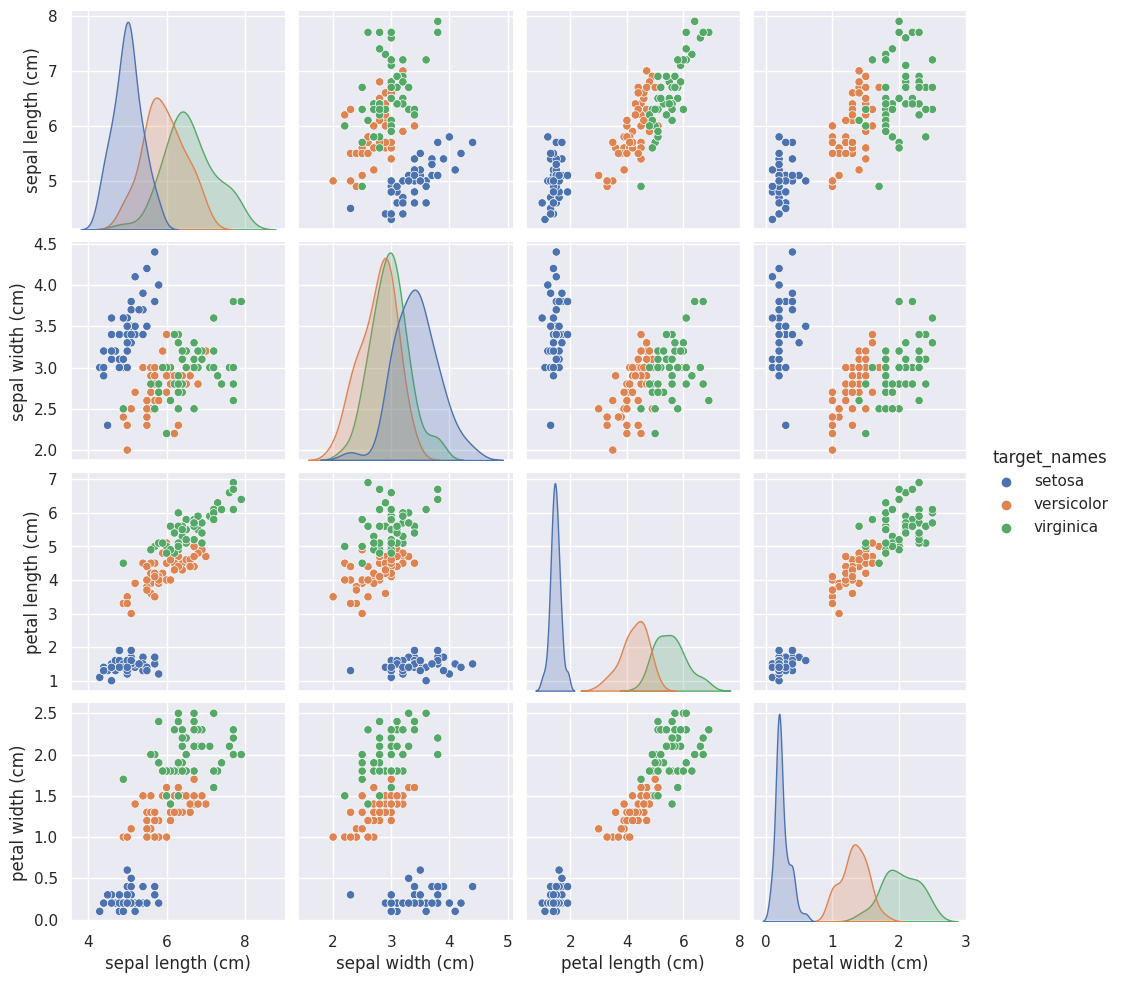

In [ ]:
sns.pairplot(iris_df,hue='target_names')

Entrenamos un Arbol de Decision por default.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

X = iris_df.drop('target_names', axis = 1)
y = iris_df['target_names']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.30)

dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
preds = dt.predict(X_test)

print( 'La precision del modelo en testing es:', accuracy_score(preds,y_test) * 100, '%' )
print( 'La precision del modelo en entrenamiento es:', dt.score(X_train, y_train)*100, '%')

print(f"La profundidad del arbol es: {dt.get_depth()}")

La precision del modelo en testing es: 100.0 %
La precision del modelo en entrenamiento es: 100.0 %
La profundidad del arbol es: 6


Viendo un grafico del arbol del modelo resultante se observa que ya en el primer nivel del arbol puede distinguir si pertenece a la especie setosa o no con solo ver el petal length. Esto se puede apreciar en el pairplot pues la setosa es la especie que mas facil es de discriminar con solo ver los graficos. Para el caso de virginica y versicolor se ve que en principio no es tan sencillo diferenciarlas, por lo que requiere un poco mas de 'decision' por parte del arbol.

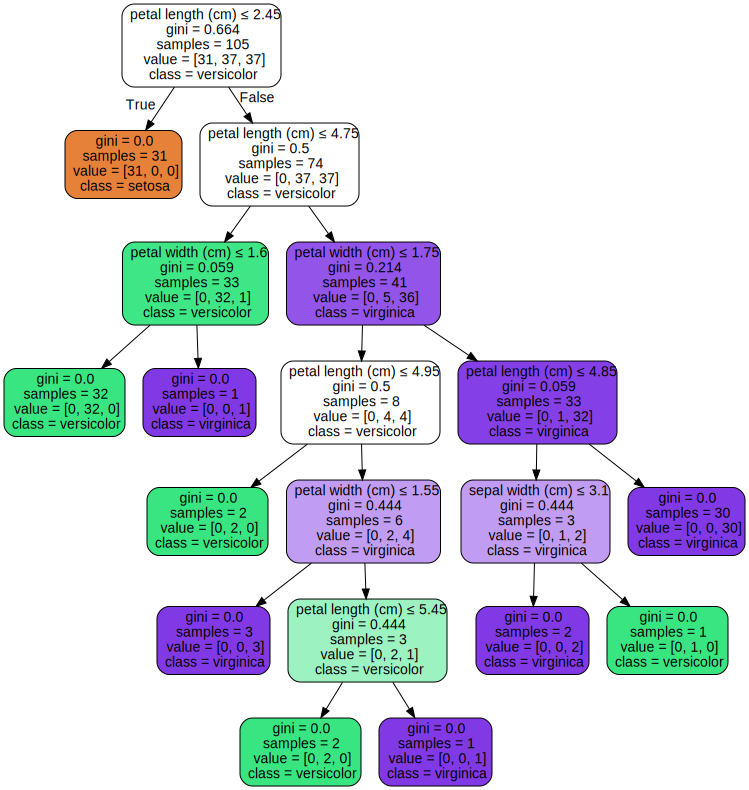

In [ ]:
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
                      feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

Veamos si un árbol más simple realiza buenas predicciones

In [ ]:
modelos = []
for h in range(1,5):
  dt_temp = tree.DecisionTreeClassifier(max_depth=h, random_state=42)
  dt_temp.fit(X_train, y_train)
  modelos.append(dt_temp)
  print(f"Accuracy para árbol de altura {h}: {100*dt_temp.score(X_test, y_test):.1f}%")

Accuracy para árbol de altura 1: 71.1%
Accuracy para árbol de altura 2: 97.8%
Accuracy para árbol de altura 3: 100.0%
Accuracy para árbol de altura 4: 100.0%


Un árbol de profundidad 3 ya obtiene 100% de accuracy y si la profundidad es 2 prácticamente también.

Veamos que forma tienen estos árboles más simples:

Para el arbol de altura 1 se puede apreciar que no puede elegir jamas la clase virignica debido a la simplicidad del modelo. La precision a primera vista no es tan mala (71%), sin embargo sabemos que se debe principalmente a que no puede atinar a la especie virginica.

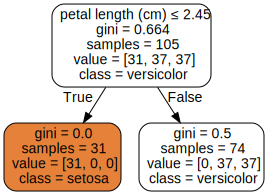

In [ ]:
dot_data2 = tree.export_graphviz(modelos[0], out_file=None,
                      feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,
                      special_characters=True)
graph2 = graphviz.Source(dot_data2)
graph2

En este caso, a pesar de ser un modelo simple la precision salta a casi al 100%. Nuevamente la setosa es la especie que es mas facil discriminar, y el pequeño error puede deberse a no diferenciar de forma perfecta las clases versicolor y virginica.

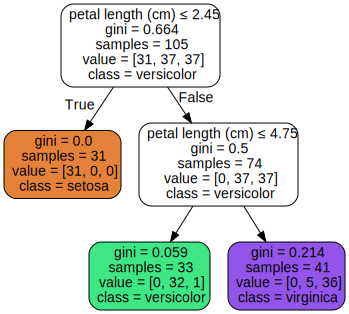

In [ ]:
dot_data3 = tree.export_graphviz(modelos[1], out_file=None,
                      feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,
                      special_characters=True)
graph3 = graphviz.Source(dot_data3)
graph3

Veamos las fronteras de decisión de un árbol simple que use únicament `petal length` y `petal width` durante su entrenamiento

<ipython-input-19-3bc9e03b6ab4>:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


Accuracy del modelo en training: 94.29%
Accuracy del modelo en testing: 100.0%


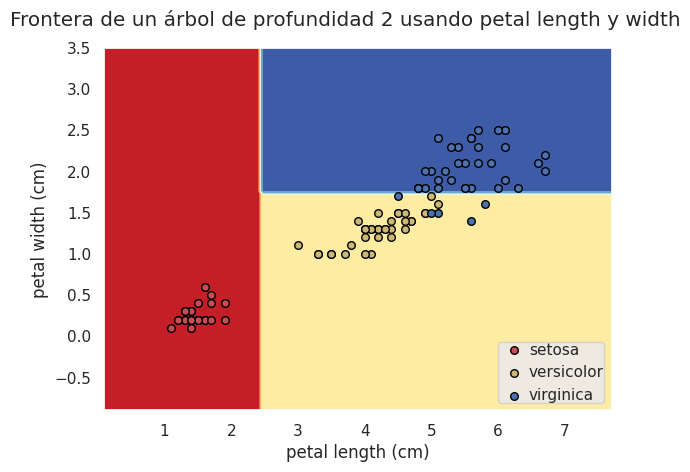

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Parameters
names_dict = {'setosa':0, 'versicolor':1, 'virginica':2}
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


X_train_vals, X_test_vals = X_train.values[:, [2,3]], X_test.values[:, [2,3]] #elegimos los features petal length y width
y_train_vals = np.array([names_dict[x] for x in y_train]) #nos quedamos con los valores numericos de y_train
y_test_vals = np.array([names_dict[x] for x in y_test])
# Train
clf = tree.DecisionTreeClassifier(max_depth=2,random_state=42).fit(X_train_vals, y_train_vals)

# Plot the decision boundary
ax = plt.subplot(1,1,1)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train_vals,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel=iris.feature_names[2],
    ylabel=iris.feature_names[3],
)

# Plot the training points

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train_vals == i)
    plt.scatter(
        X_train_vals[idx, 0],
        X_train_vals[idx, 1],
        c=color,
        label=iris.target_names[i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=30,
    )

plt.suptitle("Frontera de un árbol de profundidad 2 usando petal length y width")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

print(f"Accuracy del modelo en training: {100*clf.score(X_train_vals, y_train_vals):.2f}%")
print(f"Accuracy del modelo en testing: {100*clf.score(X_test_vals, y_test_vals)}%")

Estas fronteras fueron generadas a partir de un árbol con 2 cortes, el cual podemos visualizar más en detalle a continuación.

**Obs**: únicamente 4 instancias de la clase virginica fueron clasificadas incorrectamente (como versicolor) durante el entrenamiento y todas las instancias del conjunto de test fueron clasificadas correctamente.

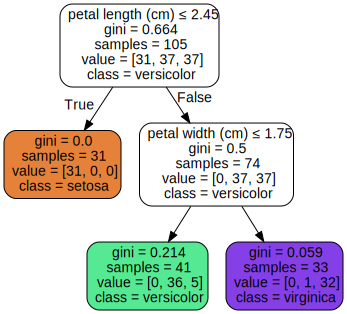

In [ ]:
dot_data4 = tree.export_graphviz(clf, out_file=None,
                                  feature_names=iris.feature_names[2:],
                                  class_names=iris.target_names,
                                  filled=True, rounded=True,
                                  special_characters=True)
graph4 = graphviz.Source(dot_data4)
graph4

Si aplicamos Random Forests se obtiene precision del 100% para cada uno de los modelos, por lo tanto mejor que DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forests = []
for h in range(1,5):
  clf = RandomForestClassifier(max_depth=h, random_state=42)
  clf.fit(X_train, y_train)
  modelos.append(dt_temp)
  print(f"Accuracy en testeo para el forest de altura {h}: {100*clf.score(X_test, y_test):.1f}%")
  print(f"Accuracy en entrenamiento para el forest de altura {h}: {100*clf.score(X_train, y_train):.1f}%")


Accuracy en testeo para el forest de altura 1: 100.0%
Accuracy en entrenamiento para el forest de altura 1: 94.3%
Accuracy en testeo para el forest de altura 2: 100.0%
Accuracy en entrenamiento para el forest de altura 2: 93.3%
Accuracy en testeo para el forest de altura 3: 100.0%
Accuracy en entrenamiento para el forest de altura 3: 95.2%
Accuracy en testeo para el forest de altura 4: 100.0%
Accuracy en entrenamiento para el forest de altura 4: 98.1%


## Weather dataset

In [ ]:
od.download('https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: matiascosarinsky
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 152MB/s]

Para descargar los datos

username: matiascosarinsky

key: e405ce39bb61bfb9929f70e607e45b67


In [ ]:
os.listdir()

['.config', 'weather-dataset-rattle-package', 'sample_data']

In [ ]:
df = pd.read_csv('./weather-dataset-rattle-package/weatherAUS.csv')

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Podemos ver que hay datos faltantes, veamos cuántos son.

In [ ]:
df.isna().sum().sort_values()

Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

Vemos también que los atributos tienen distintas escalas

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Indexamos los datos a partir de la fecha

In [ ]:
df.Date = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

Veamos cuántos datos hay para cada año

<Axes: xlabel='Date', ylabel='count'>

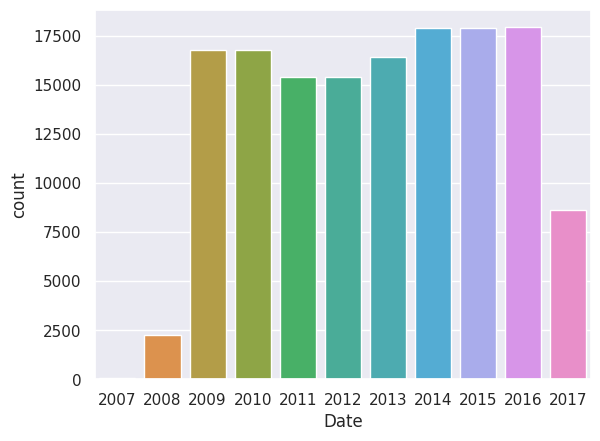

In [ ]:
sns.countplot(x=df.index.year)

Buscamos predecir la etiqueta `RainTomorrow` a partir del resto de atributos y vemos que hay muchas variables sin esta etiqueta, por lo cual eliminamos estas filas.

In [ ]:
df = df[~df['RainTomorrow'].isna()]
df.RainTomorrow.isna().sum()

0

Separamos los datos para tener un conjunto de entrenamiento/testeo y otro de evaluación manteniendo el orden cronológico.

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)
y = df.RainTomorrow

X_dev, X_eval, y_dev, y_eval = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X_dev, y_dev, test_size=0.2, shuffle=False)

Aseguramos que se haya respetado el orden cronológico

In [ ]:
np.unique(X_train.index.year), np.unique(X_test.index.year), np.unique(X_eval.index.year)

(array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]),
 array([2014, 2015]),
 array([2015, 2016, 2017]))

In [ ]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes('object').columns.tolist()

numeric_cols, cat_cols

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

Imputamos los valores numéricos faltantes a partir del promedio por mes

In [ ]:
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train.groupby(X_train.index.month)[numeric_cols].transform('mean'))
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_test.groupby(X_test.index.month)[numeric_cols].transform('mean'))
X_eval[numeric_cols] = X_eval[numeric_cols].fillna(X_eval.groupby(X_eval.index.month)[numeric_cols].transform('mean'))

X_train[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Transformamos las variables categóricas en numéricas usando OneHotEncoding y reescalamos los valores para que se encuentren todos entre 0 y 1 usando MinMaxScaler.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore').fit(X_train[cat_cols])
encoded_cols = encoder.get_feature_names_out(cat_cols)

#Transformamos variables categóricas a numéricas
X_train[encoded_cols] = encoder.transform(X_train[cat_cols])
X_test[encoded_cols] = encoder.transform(X_test[cat_cols])
X_eval[encoded_cols] = encoder.transform(X_eval[cat_cols])

scaler = MinMaxScaler()

#Reescalamos los valores numéricos entre 0 y 1
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])
X_eval[numeric_cols] = scaler.fit_transform(X_eval[numeric_cols])

Ahora si podemos quedarnos solo con las columnas numéricas y usarlas para entrenar nuestro árbol

In [ ]:
X_train, X_test, X_eval = X_train.select_dtypes(exclude='object'), X_test.select_dtypes(exclude='object'), X_eval.select_dtypes(exclude='object')

X_train.shape, X_test.shape, X_eval.shape

((91003, 114), (22751, 114), (28439, 114))

Podemos ver que el 77.5% de las etiquetas son negativas, por lo que como mínimo esperamos que nuestro modelo final supere ese nivel de accuracy.

In [ ]:
y.value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt.score(X_train, y_train) ,dt.score(X_test, y_test)

(1.0, 0.7783394136521472)

El árbol es muy profundo y está overfitteando, para reducir el overfitting podemos regular su altura

In [ ]:
from sklearn.model_selection import ParameterGrid

scores = {'Training Accuracy':[], 'Testing Accuracy': [], 'Parameters': []}
tree_params = {'max_depth':np.arange(2,10,1)}
for param in list(ParameterGrid(tree_params)):
  arbol = tree.DecisionTreeClassifier(**param, random_state=42)
  arbol.fit(X_train, y_train)
  scores['Testing Accuracy'].append(np.round(arbol.score(X_test, y_test),3))
  scores['Training Accuracy'].append(np.round(arbol.score(X_train, y_train),3))
  scores['Parameters'].append(param)

Hacemos una tabla para ver el rendimiento de cada arbol

In [ ]:
tabla_trees = pd.DataFrame(scores)
tabla_trees.sort_values(by = 'Testing Accuracy', ascending = False)

,Training Accuracy,Testing Accuracy,Parameters
5,0.846,0.843,{'max_depth': 7}
6,0.852,0.842,{'max_depth': 8}
4,0.842,0.840,{'max_depth': 6}
3,0.839,0.839,{'max_depth': 5}
7,0.859,0.839,{'max_depth': 9}
1,0.828,0.832,{'max_depth': 3}
2,0.830,0.831,{'max_depth': 4}
0,0.819,0.827,{'max_depth': 2}


Veamos el accuracy del árbol con mayor testing accuracy sobre el set que habíamos separado para evaluación

In [ ]:
mejor_dt = tree.DecisionTreeClassifier(max_depth=7, random_state=42)
mejor_dt.fit(X_train, y_train)
print(f"Accuracy sobre set de validación: {100*np.round(mejor_dt.score(X_eval, y_eval),3)}%")

Accuracy sobre set de validación: 83.39999999999999%


In [ ]:
scores_forest = {'Training Accuracy':[], 'Testing Accuracy': [], 'Parameters': []}
forest_params = {'max_depth':np.arange(2,10,1), 'max_features':['sqrt','log2',None], 'n_estimators':[10,50,100]}
for param in list(ParameterGrid(forest_params)):
  forest = RandomForestClassifier(**param, random_state=42, n_jobs=-1)
  forest.fit(X_train, y_train)
  scores_forest['Testing Accuracy'].append(np.round(forest.score(X_test, y_test), 3))
  scores_forest['Training Accuracy'].append(np.round(forest.score(X_train, y_train), 3))
  scores_forest['Parameters'].append( param )

In [ ]:
tabla_forests = pd.DataFrame(scores_forest)
tabla_ordenada = tabla_forests.sort_values(by = 'Testing Accuracy', ascending = False)

tabla_ordenada[:10]

,Training Accuracy,Testing Accuracy,Parameters
71,0.868,0.850,"{'max_depth': 9, 'max_features': None, 'n_esti..."
70,0.868,0.850,"{'max_depth': 9, 'max_features': None, 'n_esti..."
62,0.859,0.849,"{'max_depth': 8, 'max_features': None, 'n_esti..."
61,0.859,0.849,"{'max_depth': 8, 'max_features': None, 'n_esti..."
69,0.867,0.848,"{'max_depth': 9, 'max_features': None, 'n_esti..."
52,0.853,0.848,"{'max_depth': 7, 'max_features': None, 'n_esti..."
53,0.853,0.848,"{'max_depth': 7, 'max_features': None, 'n_esti..."
60,0.858,0.847,"{'max_depth': 8, 'max_features': None, 'n_esti..."
43,0.847,0.846,"{'max_depth': 6, 'max_features': None, 'n_esti..."
44,0.847,0.846,"{'max_depth': 6, 'max_features': None, 'n_esti..."


Los bosques conformados por árboles de mayor altura y `max_features = None` parecen tener mayor accuracy, mientras que la cantidad de estimadores usados para el ensamble no parece afectar mucho. Los de mayor profundidad parecen ser levemente mejores aunque no hay gran diferencia.

In [ ]:
mejor_rf = RandomForestClassifier(**tabla_ordenada['Parameters'][0], random_state=42, n_jobs=-1)
mejor_rf.fit(X_train, y_train)
print(f"Accuracy sobre set de validación: {100*np.round(mejor_rf.score(X_eval, y_eval),3)}%")

Accuracy sobre set de validación: 78.60000000000001%


El accuracy es más bajo que la del árbol de decisión de antes, pero si consideramos un nuevo modelo donde los árboles son menos profundos da un valor muy similar al de antes

In [ ]:
rf = RandomForestClassifier(max_depth=6, n_estimators=10, max_features=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
print(f"Accuracy sobre set de validación: {100*np.round(rf.score(X_eval, y_eval),3)}%")

Accuracy sobre set de validación: 83.6%


Estos modelos usan 97 atributos pero es posible que gran parte de ellos no sean determinantes, veamos cuales son los más importantes

In [ ]:
importancias = pd.DataFrame({'Feature':X_train.columns, 'Importance': rf.feature_importances_})
importancias_ordenadas = importancias.sort_values('Importance', ascending=False)
importancias_ordenadas[:10]

,Feature,Importance
9,Humidity3pm,0.675830
2,Rainfall,0.097387
5,WindGustSpeed,0.074971
11,Pressure3pm,0.054269
4,Sunshine,0.052376
13,Cloud3pm,0.016440
14,Temp9am,0.006263
10,Pressure9am,0.004753
15,Temp3pm,0.003082
112,RainToday_Yes,0.002648


De los 97 atributos muy pocos parecen ser útiles, el más importante de todos resulta ser `Humidity3pm`. De hecho tomando los 6 más importantes se ve representada el 95.6% de todos los atributos

In [ ]:
np.sum(importancias.sort_values('Importance', ascending=False)[:6]['Importance']).round(3)

0.971